<a href="https://colab.research.google.com/github/emmelinetsen/faceAI/blob/master/Gan_test_258Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import PIL
from PIL import Image
from skimage import data_dir,io,transform,color
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/'
base_dir = root_dir + 'CMPE258/team_project/'
data_dir_me=base_dir+'data/'

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
import os, datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from skimage import data_dir,io,transform,color

Using TensorFlow backend.


In [0]:
import random
import shutil
from shutil import copy2
%matplotlib inline
import glob

##Convert img into numeric

In [0]:
import os

In [0]:
data_gan_path=base_dir+'data/stylegan2/'

Functions to convert imgs to array , and convert array to imgs.

In [0]:
from keras.preprocessing import image

In [0]:
def gan_imgs_to_arr(path,start_num,end_num):    
    data = []
    file_names=os.listdir(path)
    for i in range(start_num,end_num):
        filename=file_names[i]                 
        file_path =path+filename               
        img = image.load_img(file_path,target_size=(48,48))                         
        re_img = np.asarray(img)        
        data.append(re_img.astype(np.uint8))    
    return data
     
def arr_to_imgs(imgs_array):
    images=[]
    for img_arr in imgs_array:
        img=Image.fromarray(np.uint8(img_arr))
        images.append(img)
    return images
        
                  

In [0]:
data_gan= gan_imgs_to_arr(data_gan_path,500,1000)

In [0]:
len(data_gan)

500

In [0]:
images_gan=arr_to_imgs(data_gan)

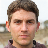

In [0]:
images_gan[0]

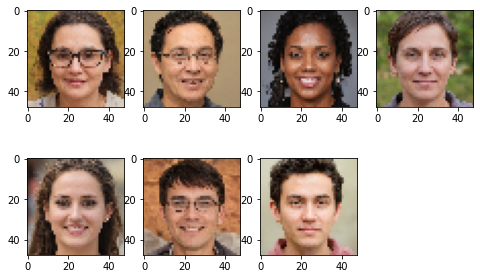

In [0]:
plt.figure(0, figsize=(8,5))
for i in range(1,8):
    img = data_gan[i]    
    plt.subplot(2,4,i)
    plt.imshow(img)    

plt.show()  

In [0]:
from tensorflow.keras.models import load_model
# loading CNN model for facial expression recognition
model = load_model(base_dir+'models/CNN_Model_2.h5') 

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_29 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_30 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 64)       

In [0]:
test_gan = np.array(data_gan).reshape(-1,48,48,3)/255.0 


In [0]:
predictions = model.predict(test_gan)


In [0]:
img_test6=Image.fromarray(data_gan[6])

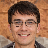

In [0]:
img_test6

In [0]:
emotion_map_all = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral',7:'Embarrassed'}

In [0]:
label_6=emotion_map_all[np.argmax(predictions[6])]

In [0]:
print(label_6)

Happy


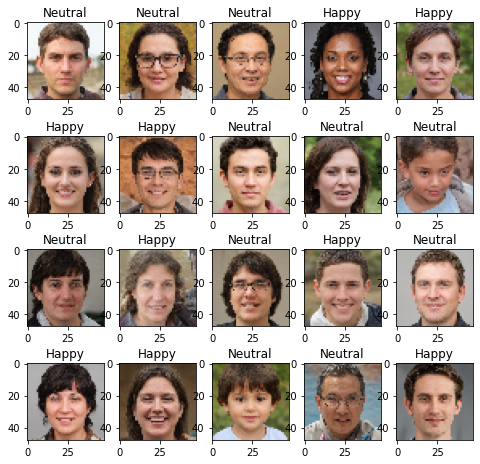

In [0]:
plt.figure(0, figsize=(8,8))
for i in range(1,21):
    img = data_gan[i-1]    
    plt.subplot(4,5,i)
    plt.imshow(img)
    label_prdict=emotion_map_all[np.argmax(predictions[i-1])]
    plt.title(label_prdict)

plt.show()  

In [0]:
label_list=[]
for pred in predictions:
  label=emotion_map_all[np.argmax(pred)]
  label_list.append(label)
print(label_list)


['Neutral', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Neutral', 'Neutra

In [0]:
pred_df=pd.DataFrame({'label':label_list})

In [0]:
pred_df['label'].value_counts()

Happy      290
Neutral    209
Angry        1
Name: label, dtype: int64